---

# Data Analysis

Let's better understand what we're dealing with. What does the data look like?

---

In [185]:
import pandas as pd
import folium

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import matplotlib.dates as mdates

import matplotlib.colors as colors

In [186]:
# Load the data from the CSV files
data = pd.read_csv('csv/data_cleaned.csv')
target_data = pd.read_csv('csv/target_data.csv')
data_reindexed = pd.read_csv('csv/data_reindexed.csv')
target_data_reindexed = pd.read_csv('csv/target_data_reindexed.csv')


# Display the first few rows of each dataframe to verify the data

print("\nData:")
display(data)

print("Target Data:")
display(target_data)

print("\nData Reindexed:")
display(data_reindexed)

print("\nTarget Data Reindexed:")
display(target_data_reindexed)


Data:


,Date,EventCode,ActionGeo_FullName,ActionGeo_Lat,ActionGeo_Long,AvgTone
0,2024-08-23,145,"Union Park, Illinois, United States",41.8839,-87.6648,-3.046968
1,2024-08-22,145,"Union Park, Illinois, United States",41.8839,-87.6648,0.000000
2,2024-08-20,145,"Union Park, Illinois, United States",41.8839,-87.6648,-4.319654
3,2024-08-20,145,"Union Park, Illinois, United States",41.8839,-87.6648,-4.319654
4,2024-06-27,145,"Buckingham Fountain, Illinois, United States",41.8756,-87.6189,-7.052186
...,...,...,...,...,...,...
3490,2015-01-19,145,"Chicago, Illinois, United States",41.8500,-87.6501,2.494577
3491,2015-01-19,145,"Chicago, Illinois, United States",41.8500,-87.6501,2.857143
3492,2015-01-19,145,"Chicago, Illinois, United States",41.8500,-87.6501,2.494577
3493,2015-01-19,145,"Chicago, Illinois, United States",41.8500,-87.6501,2.494577


Target Data:


,Date,EventCode,ActionGeo_FullName,ActionGeo_Lat,ActionGeo_Long,AvgTone
0,2024-08-23,145,"Union Park, Illinois, United States",41.8839,-87.6648,-3.046968
1,2024-08-22,145,"Union Park, Illinois, United States",41.8839,-87.6648,0.000000
2,2024-08-20,145,"Union Park, Illinois, United States",41.8839,-87.6648,-4.319654
3,2024-08-20,145,"Union Park, Illinois, United States",41.8839,-87.6648,-4.319654
4,2024-06-27,145,"Buckingham Fountain, Illinois, United States",41.8756,-87.6189,-7.052186
...,...,...,...,...,...,...
219,2016-03-20,145,"University Of Illinois At Chicago, Illinois, U...",41.8720,-87.6492,-7.417219
220,2016-03-20,145,"University Of Illinois At Chicago, Illinois, U...",41.8720,-87.6492,-7.417219
221,2016-03-13,145,"University Of Illinois At Chicago, Illinois, U...",41.8720,-87.6492,-8.571429
222,2016-03-13,145,"University Of Illinois At Chicago, Illinois, U...",41.8720,-87.6492,-8.571429



Data Reindexed:


,Date,Number of Events,Total AvgTone
0,2015-01-08,1,2.007772
1,2015-01-09,0,0.000000
2,2015-01-10,0,0.000000
3,2015-01-11,0,0.000000
4,2015-01-12,0,0.000000
...,...,...,...
3636,2024-12-22,0,0.000000
3637,2024-12-23,0,0.000000
3638,2024-12-24,0,0.000000
3639,2024-12-25,0,0.000000



Target Data Reindexed:


,Date,Number of Events,Total AvgTone
0,2015-12-25,1,-12.850954
1,2015-12-26,0,0.000000
2,2015-12-27,0,0.000000
3,2015-12-28,0,0.000000
4,2015-12-29,0,0.000000
...,...,...,...
3285,2024-12-22,0,0.000000
3286,2024-12-23,0,0.000000
3287,2024-12-24,0,0.000000
3288,2024-12-25,0,0.000000


---

## Event Time 

Let's take a look at when the events occured.


---

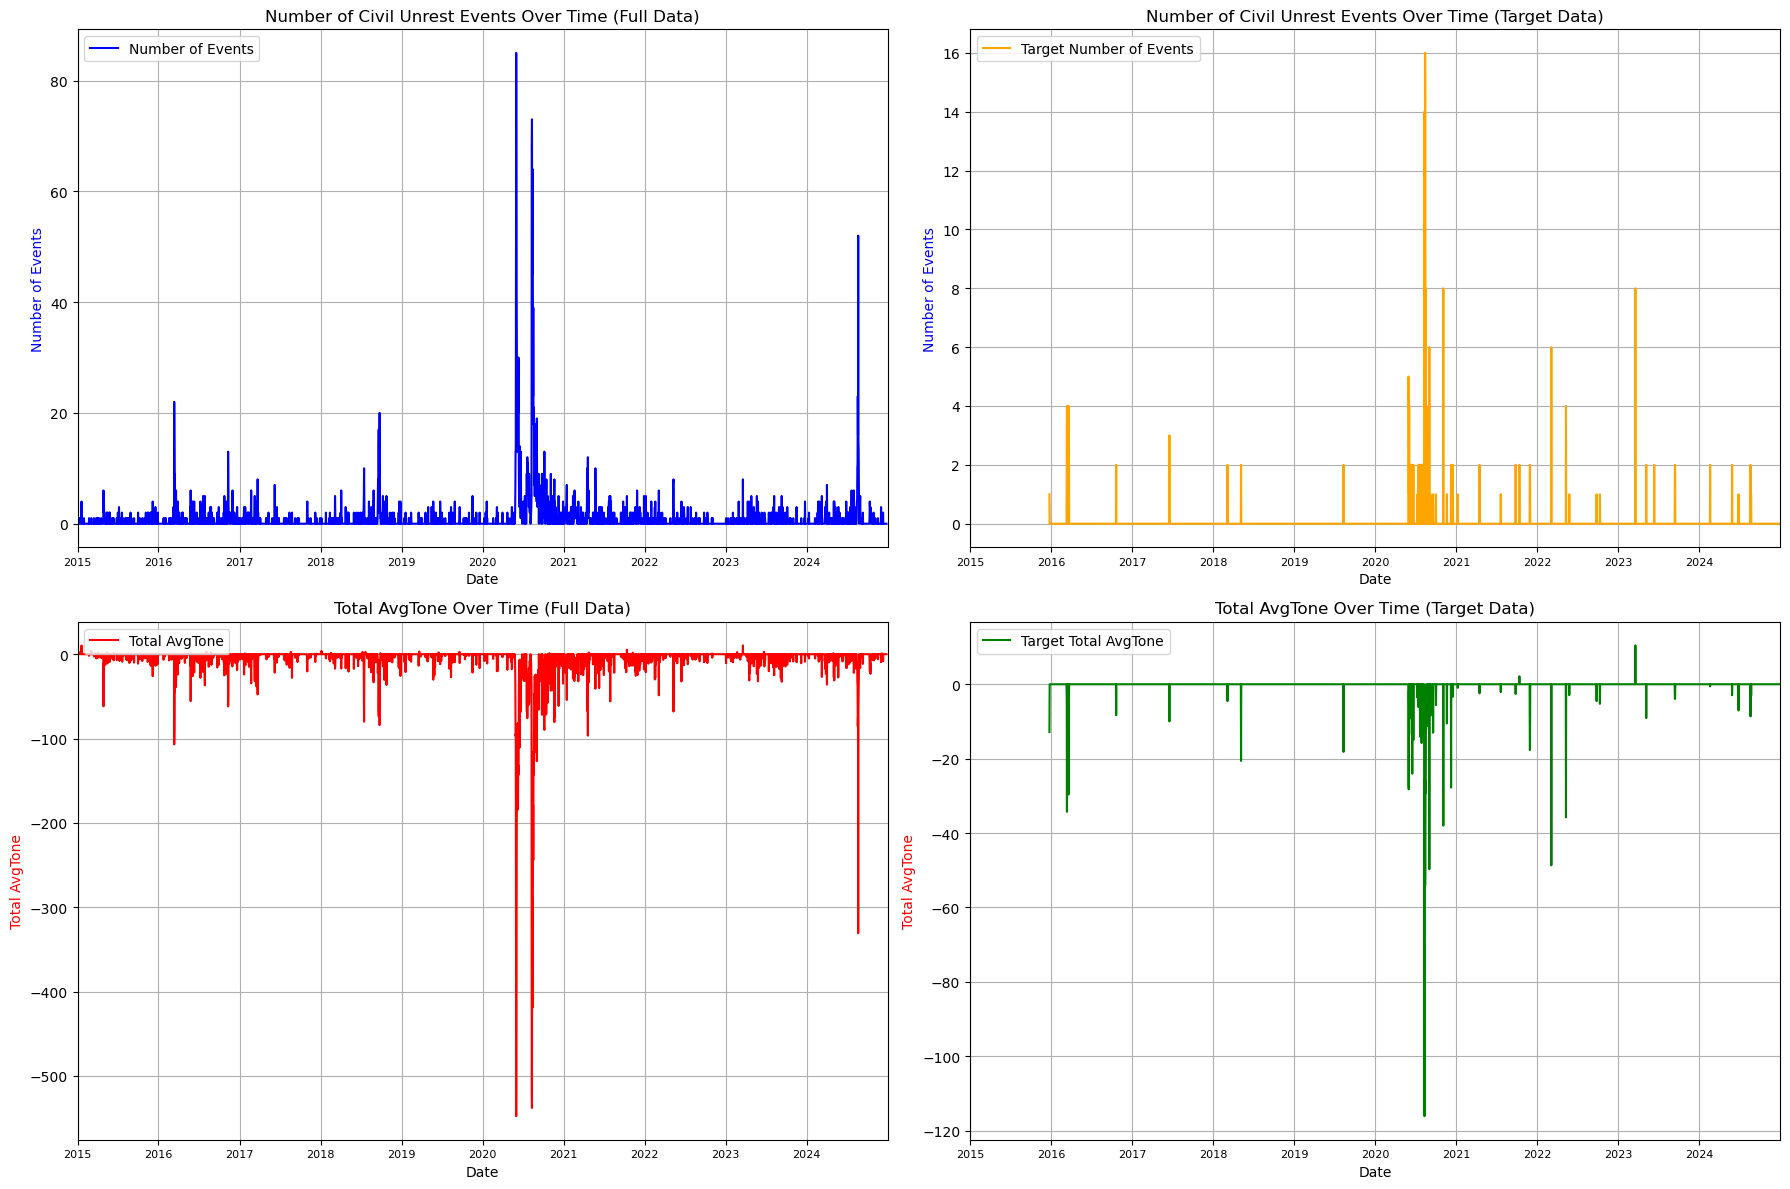

In [187]:
# Convert Date columns to datetime
data_reindexed['Date'] = pd.to_datetime(data_reindexed['Date'])
target_data_reindexed['Date'] = pd.to_datetime(target_data_reindexed['Date'])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Define the date range for the x-axis
date_range = pd.date_range(start='2015-01-01', end='2024-12-31')

# Plot the number of events for full data
axes[0, 0].plot(data_reindexed['Date'], data_reindexed['Number of Events'], label='Number of Events', color='b')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Events', color='b')
axes[0, 0].set_title('Number of Civil Unrest Events Over Time (Full Data)')
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)
axes[0, 0].xaxis.set_major_locator(mdates.YearLocator())
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0, 0].tick_params(axis='x', labelsize=8)
axes[0, 0].set_xlim(date_range[0], date_range[-1])

# Plot the number of events for target data
axes[0, 1].plot(target_data_reindexed['Date'], target_data_reindexed['Number of Events'], label='Target Number of Events', color='orange')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Events', color='b')
axes[0, 1].set_title('Number of Civil Unrest Events Over Time (Target Data)')
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)
axes[0, 1].xaxis.set_major_locator(mdates.YearLocator())
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0, 1].tick_params(axis='x', labelsize=8)
axes[0, 1].set_xlim(date_range[0], date_range[-1])

# Plot the Total AvgTone for full data
axes[1, 0].plot(data_reindexed['Date'], data_reindexed['Total AvgTone'], label='Total AvgTone', color='r')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total AvgTone', color='r')
axes[1, 0].set_title('Total AvgTone Over Time (Full Data)')
axes[1, 0].legend(loc='upper left')
axes[1, 0].grid(True)
axes[1, 0].xaxis.set_major_locator(mdates.YearLocator())
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1, 0].tick_params(axis='x', labelsize=8)
axes[1, 0].set_xlim(date_range[0], date_range[-1])

# Plot the Total AvgTone for target data
axes[1, 1].plot(target_data_reindexed['Date'], target_data_reindexed['Total AvgTone'], label='Target Total AvgTone', color='green')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total AvgTone', color='r')
axes[1, 1].set_title('Total AvgTone Over Time (Target Data)')
axes[1, 1].legend(loc='upper left')
axes[1, 1].grid(True)
axes[1, 1].xaxis.set_major_locator(mdates.YearLocator())
axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1, 1].tick_params(axis='x', labelsize=8)
axes[1, 1].set_xlim(date_range[0], date_range[-1])

plt.tight_layout()
plt.show()


---

The South Loop neighborhood in Chicago experienced significant protest activity during the summer of 2020, particularly in late May and early June, following the death of George Floyd. On May 30, 2020, protests escalated into unrest and looting, resulting in substantial damage to businesses in the South Loop. Reports indicate that on May 31, 2020, the area was left with major damage as it prepared for another night of protests.

---

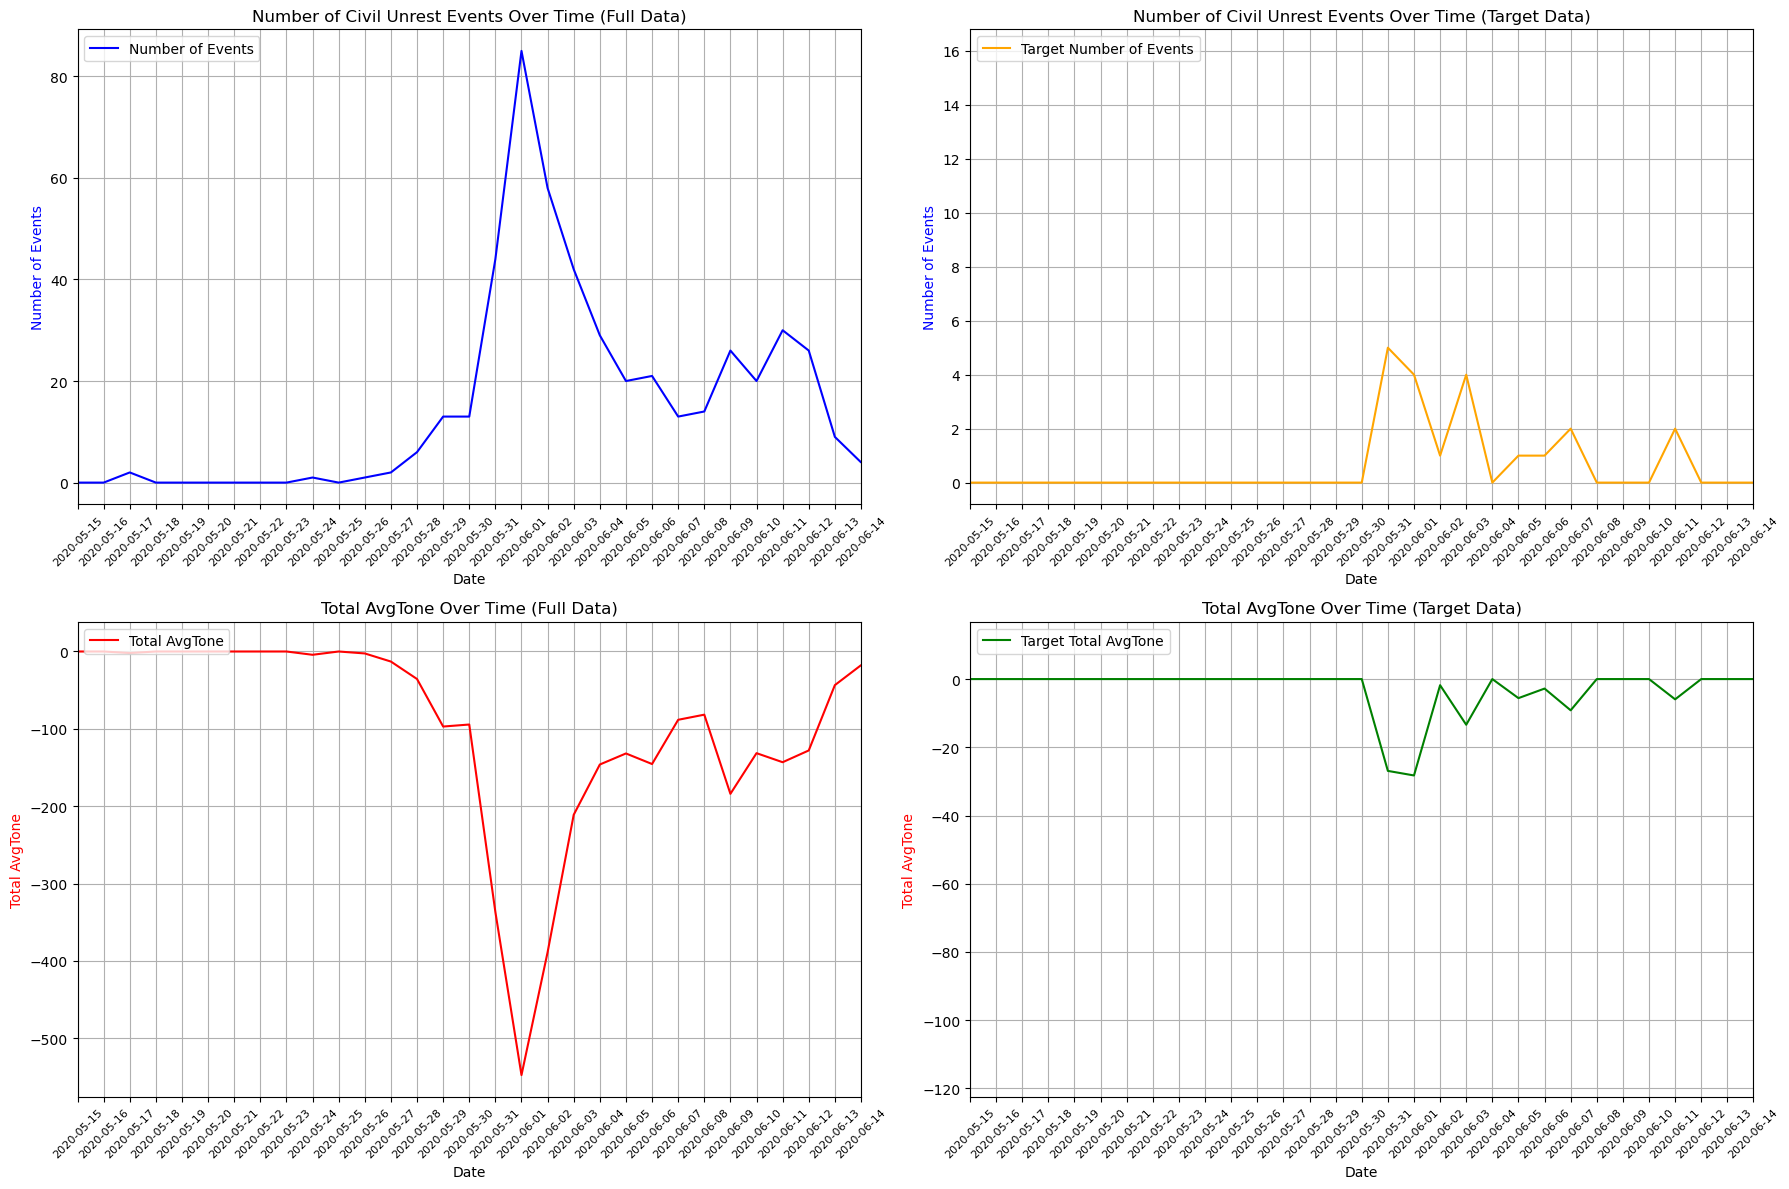

In [188]:
# Convert Date columns to datetime
data_reindexed['Date'] = pd.to_datetime(data_reindexed['Date'])
target_data_reindexed['Date'] = pd.to_datetime(target_data_reindexed['Date'])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Define the date range for the x-axis
start_date = pd.to_datetime('2020-05-15')
end_date = pd.to_datetime('2020-06-14')

# Plot the number of events for full data
axes[0, 0].plot(data_reindexed['Date'], data_reindexed['Number of Events'], label='Number of Events', color='b')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Events', color='b')
axes[0, 0].set_title('Number of Civil Unrest Events Over Time (Full Data)')
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)
axes[0, 0].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 0].tick_params(axis='x', labelsize=8, rotation=45)
axes[0, 0].set_xlim(start_date, end_date)

# Plot the number of events for target data
axes[0, 1].plot(target_data_reindexed['Date'], target_data_reindexed['Number of Events'], label='Target Number of Events', color='orange')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Events', color='b')
axes[0, 1].set_title('Number of Civil Unrest Events Over Time (Target Data)')
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)
axes[0, 1].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 1].tick_params(axis='x', labelsize=8, rotation=45)
axes[0, 1].set_xlim(start_date, end_date)

# Plot the Total AvgTone for full data
axes[1, 0].plot(data_reindexed['Date'], data_reindexed['Total AvgTone'], label='Total AvgTone', color='r')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total AvgTone', color='r')
axes[1, 0].set_title('Total AvgTone Over Time (Full Data)')
axes[1, 0].legend(loc='upper left')
axes[1, 0].grid(True)
axes[1, 0].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 0].tick_params(axis='x', labelsize=8, rotation=45)
axes[1, 0].set_xlim(start_date, end_date)

# Plot the Total AvgTone for target data
axes[1, 1].plot(target_data_reindexed['Date'], target_data_reindexed['Total AvgTone'], label='Target Total AvgTone', color='green')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total AvgTone', color='r')
axes[1, 1].set_title('Total AvgTone Over Time (Target Data)')
axes[1, 1].legend(loc='upper left')
axes[1, 1].grid(True)
axes[1, 1].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 1].tick_params(axis='x', labelsize=8, rotation=45)
axes[1, 1].set_xlim(start_date, end_date)

plt.tight_layout()
plt.show()


---

It's clear that Total AvgTone looks like an excellent data label for determining how "disruptive" an event was. 

Let's take a closer look at the peaks in the data

---

---

## Event Location

We've largely defined and understood our event locations.
* We've identified what makes for a "relevant" event, as it's proximal to our commute.

One area of consideration is to see which events occur at the same location. 

Let's make a map of the unqiue geographic areas, and then create a total avgtone scoring for each location, and then use a color tone to map the nimimum total avgtone for a loaciton as a dark red, and the max total avgtone as the lightest red.

---

In [189]:
from matplotlib.colors import Normalize

# Group the data by location and calculate the total AvgTone for each location
location_data = data.groupby(['ActionGeo_Lat', 'ActionGeo_Long']).agg({'AvgTone': 'sum'}).reset_index()

# Print the number of unique locations
print(f"Number of unique locations: {location_data.shape[0]}")

Number of unique locations: 32


In [190]:
#location_data

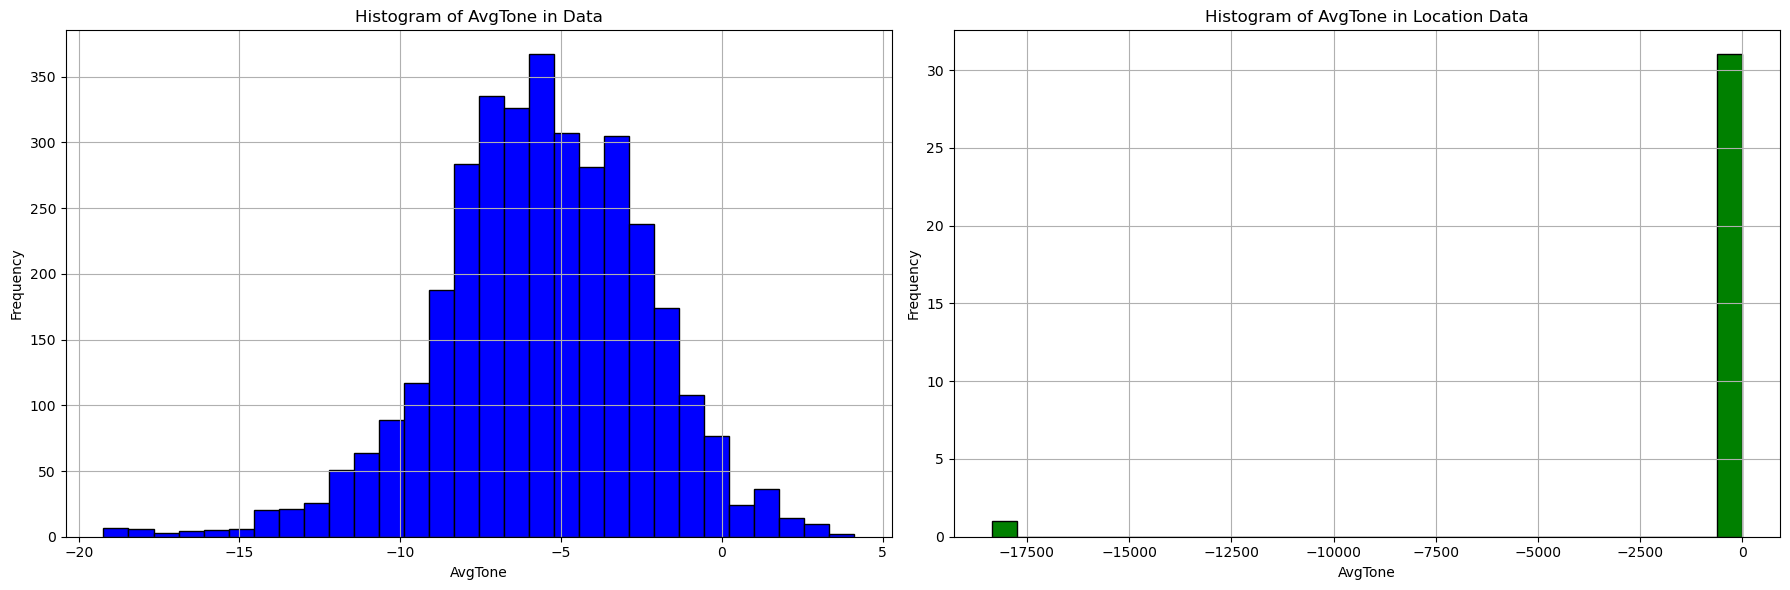

In [191]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram of AvgTone in data
axes[0].hist(data['AvgTone'], bins=30, color='blue', edgecolor='black')
axes[0].set_xlabel('AvgTone')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of AvgTone in Data')
axes[0].grid(True)

# Histogram of AvgTone in location_data
axes[1].hist(location_data['AvgTone'], bins=30, color='green', edgecolor='black')
axes[1].set_xlabel('AvgTone')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of AvgTone in Location Data')
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [192]:
# Create a folium map centered around Chicago with zoom level 13
# Calculate the center of the bounds of the data
center_lat = data['ActionGeo_Lat'].mean()
center_long = data['ActionGeo_Long'].mean()

# Create a folium map centered around the calculated center with zoom level 13
m = folium.Map(location=[center_lat, center_long], zoom_start=13)

# Define the colormap and normalization for AvgTone, ensuring white is not an option
colormap = plt.get_cmap('Reds')
norm = Normalize(vmin=location_data['AvgTone'].min(), vmax=location_data['AvgTone'].max())

# Add markers for each unique location in the location_data DataFrame
for index, row in location_data.iterrows():
    # Calculate the radius based on the normalized AvgTone value (inverted to make lower AvgTone larger)
    radius = 200 * (1 - norm(row['AvgTone'])) + 50  # Increased radius and added a minimum size
    # Get the color based on the normalized AvgTone value, ensuring white is not an option
    color = colors.rgb2hex(colormap(norm(row['AvgTone'])))
    folium.Circle(
        location=[row['ActionGeo_Lat'], row['ActionGeo_Long']],
        radius=radius,
        color='black',  # Set the outline color to black
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Location, Total AvgTone: {row['AvgTone']}"
    ).add_to(m)

# Save and display the map
m.save("map.html")
m

---

There's certainly an outlier here. Let's isolate it.

---

In [193]:
# Find the row with the minimum AvgTone
min_avg_tone_index = location_data['AvgTone'].idxmin()

# Save the outlier row
outlier = location_data.loc[min_avg_tone_index]

# Remove the row with the minimum AvgTone
location_data = location_data.drop(min_avg_tone_index)

# Display the updated location_data
#location_data

---

Let's go ahead and check the distributions again.

---

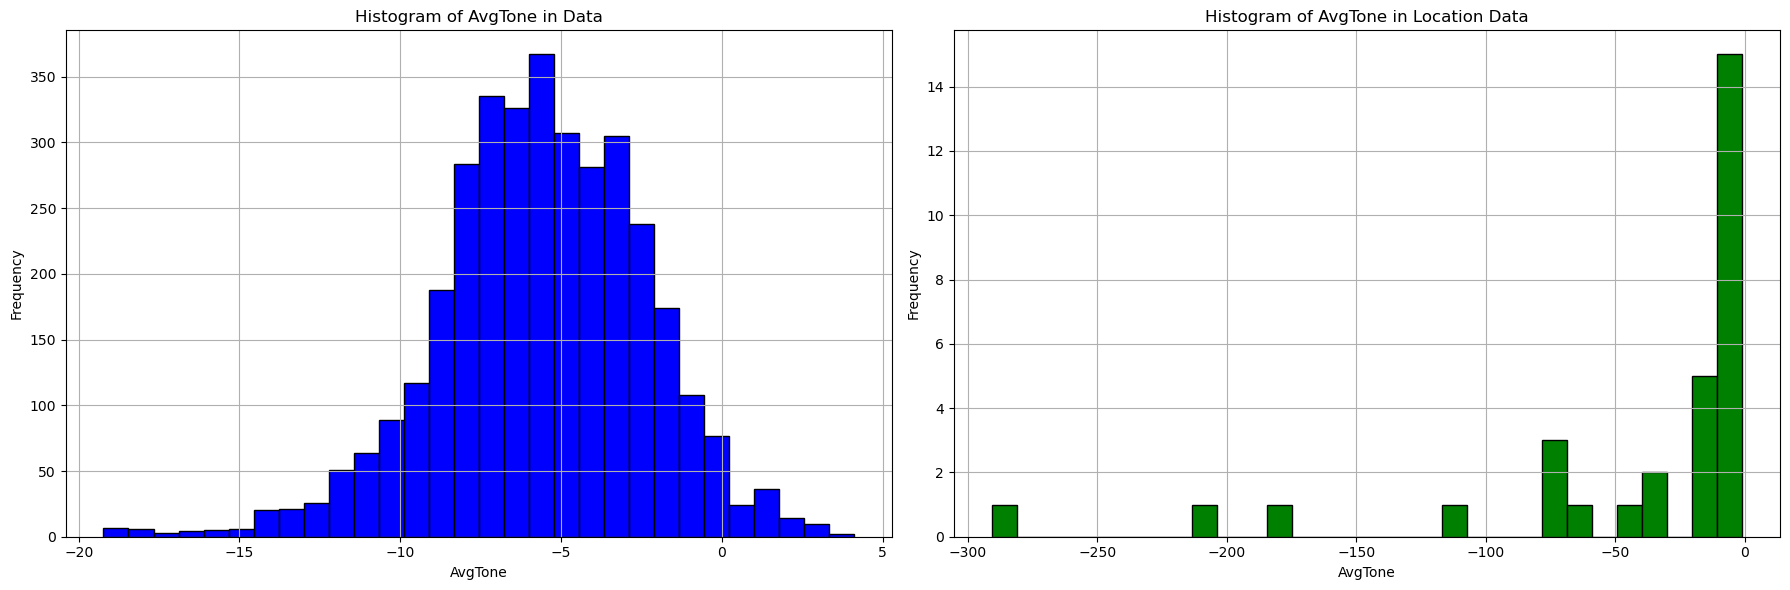

In [194]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram of AvgTone in data
axes[0].hist(data['AvgTone'], bins=30, color='blue', edgecolor='black')
axes[0].set_xlabel('AvgTone')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of AvgTone in Data')
axes[0].grid(True)

# Histogram of AvgTone in location_data
axes[1].hist(location_data['AvgTone'], bins=30, color='green', edgecolor='black')
axes[1].set_xlabel('AvgTone')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of AvgTone in Location Data')
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

---

That's much more reasonable. Clearly some clustering, but it's not absurd. We'll need to explore that more later.

---

In [195]:
# Create a folium map centered around Chicago with zoom level 10
# Calculate the center of the bounds of the data
center_lat = data['ActionGeo_Lat'].mean()
center_long = data['ActionGeo_Long'].mean()

# Create a folium map centered around the calculated center with zoom level 13
m = folium.Map(location=[center_lat, center_long], zoom_start=13)

# Define the normalization for AvgTone using Normalize
norm = Normalize(vmin=location_data['AvgTone'].min(), vmax=location_data['AvgTone'].max())

# Add markers for each unique location in the location_data DataFrame
for index, row in location_data.iterrows():
    # Calculate the radius based on the normalized AvgTone value (inverted to make lower AvgTone larger)
    radius = 200 * (1 - norm(row['AvgTone'])) + 50  # Increased radius and added a minimum size
    # Get the color based on the normalized AvgTone value
    color = colors.rgb2hex(colormap(norm(row['AvgTone'])))
    folium.Circle(
        location=[row['ActionGeo_Lat'], row['ActionGeo_Long']],
        radius=radius,
        color='black',  # Set the outline color to black
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Location, Total AvgTone: {row['AvgTone']}"
    ).add_to(m)

# Save and display the map
m.save("map.html")
m

---

We'll return to unpack this outlier later, but now we can more clearly see the distribution. this all makes sense for now.

---

---

## Event Duplication

---

One other thing I want to check - is there any duplicate events at the same location?

---

In [23]:
# Check for duplicate events based on all columns
duplicate_events = data[data.duplicated()]

# Display the duplicate events based on all columns
print("Duplicate events based on all columns:")
display(duplicate_events)

Duplicate events based on all columns:


,SQLDATE,EventCode,ActionGeo_FullName,ActionGeo_Lat,ActionGeo_Long,AvgTone
3,20240820,145,"Union Park, Illinois, United States",41.8839,-87.6648,-4.319654
10,20230613,145,"World Trade Center, Illinois, United States",41.8889,-87.6303,0.000000
13,20230320,145,"Art Institute Of Chicago, Illinois, United States",41.8795,-87.6223,1.306141
14,20230320,145,"Art Institute Of Chicago, Illinois, United States",41.8795,-87.6223,1.306141
15,20230320,145,"Art Institute Of Chicago, Illinois, United States",41.8795,-87.6223,1.306141
20,20220511,145,"Chicago River, Illinois, United States",41.8867,-87.6373,-8.947368
22,20220306,145,"Chicago Loop, Illinois, United States",41.8811,-87.6298,-8.115543
23,20220306,145,"Chicago Loop, Illinois, United States",41.8811,-87.6298,-8.115543
25,20211130,145,"Wicker Park, Illinois, United States",41.9075,-87.6770,-8.672087
27,20211129,145,"Wicker Park, Illinois, United States",41.9075,-87.6770,-8.847185


---

This is rather odd. I'll revert to investigate more later.

---

---

## Event Total AvgTone Distribution

---

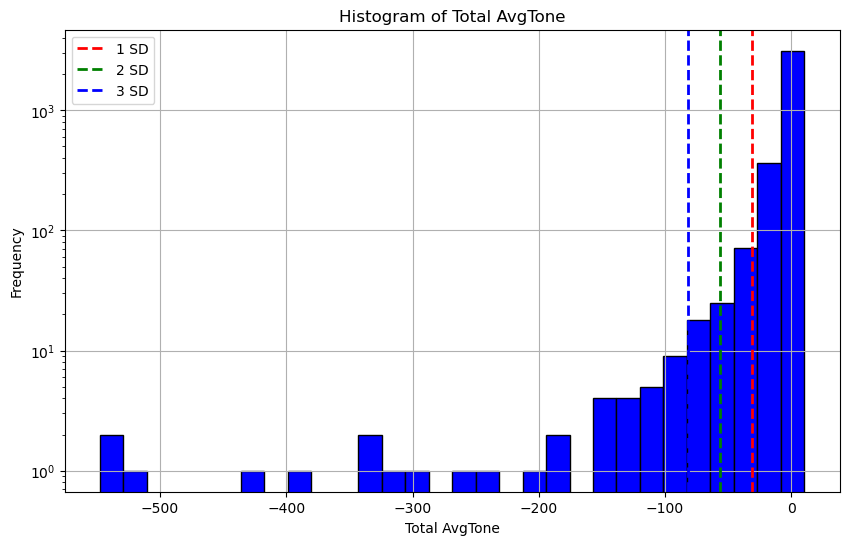

In [198]:
# Calculate mean and standard deviation
mean_avg_tone = data_reindexed['Total AvgTone'].mean()
std_avg_tone = data_reindexed['Total AvgTone'].std()

# Create a histogram of Total AvgTone with linear scale
plt.figure(figsize=(10, 6))
plt.hist(data_reindexed['Total AvgTone'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Total AvgTone')
plt.ylabel('Frequency')
plt.title('Histogram of Total AvgTone')
plt.yscale('log')
plt.grid(True)

# Add vertical lines for 1 SD, 2 SD, and 3 SD
plt.axvline(mean_avg_tone - std_avg_tone, color='r', linestyle='dashed', linewidth=2, label='1 SD')
plt.axvline(mean_avg_tone - 2 * std_avg_tone, color='g', linestyle='dashed', linewidth=2, label='2 SD')
plt.axvline(mean_avg_tone - 3 * std_avg_tone, color='b', linestyle='dashed', linewidth=2, label='3 SD')

# Add legend
plt.legend()
plt.show()


---

I included a logorithmic distribution of frequency becuase clearly most days in Chicago have very few events (thank God!). I also included the SD of AvgTone in the graph to help unpack the spread of the data. Note: this is not normally distributed, so SD only really conveys spread.

---
